<h1>Activity 2 - UK Road Accident Data Analytics</h1>
<hr>
<h3>Analyst: John Oliver A. Liwanag</h3>

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
road_accidents = pd.read_csv('datasets\\uk_road_accident.csv')
road_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
road_accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

<h1>Fill Null Values</h1>

In [6]:
road_accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
road_accidents['Latitude'] = road_accidents['Latitude'].fillna(road_accidents['Latitude'].mean())
road_accidents['Longitude'] = road_accidents['Longitude'].fillna(road_accidents['Longitude'].mean())
road_accidents['Road_Surface_Conditions'] = road_accidents['Road_Surface_Conditions'].fillna(road_accidents['Road_Surface_Conditions'].mode()[0])
road_accidents['Road_Type'] = road_accidents['Road_Type'].fillna(road_accidents['Road_Type'].mode()[0])
road_accidents['Urban_or_Rural_Area'] = road_accidents['Urban_or_Rural_Area'].fillna(road_accidents['Urban_or_Rural_Area'].mode()[0])
road_accidents['Weather_Conditions'] = road_accidents['Weather_Conditions'].fillna(road_accidents['Weather_Conditions'].mode()[0])

road_accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting Date Information</h1>

In [9]:
road_accidents['Accident Date'] = pd.to_datetime(road_accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [10]:
road_accidents['Year'] = road_accidents['Accident Date'].dt.year
road_accidents['Month'] = road_accidents['Accident Date'].dt.month
road_accidents['Day'] = road_accidents['Accident Date'].dt.day
road_accidents['DayOfWeek'] = road_accidents['Accident Date'].dt.dayofweek

road_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,NaN,NaN,NaN,NaN
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019.0,9.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN


<h1>Change Data Types</h1>

In [12]:
road_accidents['Accident_Severity'] = road_accidents['Accident_Severity'].astype('category')
road_accidents['Light_Conditions'] = road_accidents['Light_Conditions'].astype('category')
road_accidents['District Area'] = road_accidents['District Area'].astype('category')
road_accidents['Road_Surface_Conditions'] = road_accidents['Road_Surface_Conditions'].astype('category')
road_accidents['Road_Type'] = road_accidents['Road_Type'].astype('category')
road_accidents['Urban_or_Rural_Area'] = road_accidents['Urban_or_Rural_Area'].astype('category')
road_accidents['Weather_Conditions'] = road_accidents['Weather_Conditions'].astype('category')
road_accidents['Vehicle_Type'] = road_accidents['Vehicle_Type'].astype('category')

road_accidents['Year'] = road_accidents['Year'].astype('Int64')
road_accidents['Month'] = road_accidents['Month'].astype('Int64')
road_accidents['Day'] = road_accidents['Day'].astype('Int64')
road_accidents['DayOfWeek'] = road_accidents['DayOfWeek'].astype('Int64')

road_accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                Int64
Month                               Int64
Day                                 Int64
DayOfWeek                           Int64
dtype: object

<hr>
<h1>Questions:</h1>
<h3>1. How many accidents are considered slight, serious or fatal? </h3>

In [14]:
accident_severities = road_accidents['Accident_Severity'].value_counts()
accident_severities

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

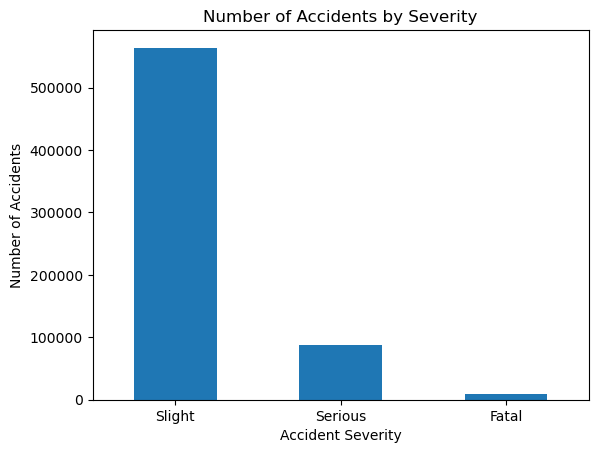

In [15]:
accident_severities.plot(kind='bar')
plt.title('Number of Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

<h1>Insight #1</h1>
<h3>There are 563,801 slight accidents, 88,217 serious accidents and 8,661 fatal accidents with a total of 660,679 accidents accross all the data.</h3>
<hr>
<h3>2. Does accidents happen more on urban or rural area?
</h3>

In [17]:
road_accidents['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: category
Categories (3, object): ['Rural', 'Unallocated', 'Urban']

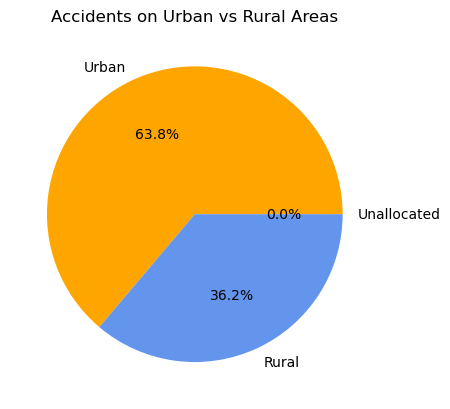

In [18]:
road_accidents['Urban_or_Rural_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'cornflowerblue'])

plt.title('Accidents on Urban vs Rural Areas')
plt.ylabel('')
plt.show()

<h1>Insight #2</h1>
<h3>Urban areas have more accidents experiencing 27.6% more than the rural areas.</h3>
<hr>
<h3>3. What is the highest number of casualties in the road accidents?
</h3>

In [20]:
road_accidents.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Day,DayOfWeek
count,265007,660679.000000,660679.000000,660679.000000,660679.000000,265007.0,265007.0,265007.0,265007.0
mean,2020-11-23 16:22:04.873683456,52.553866,-1.431210,1.357040,1.831255,2020.407216,6.708374,6.522028,3.106367
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.0,1.0,1.0,0.0
25%,2019-12-03 00:00:00,51.490696,-2.332191,1.000000,1.000000,2019.0,4.0,4.0,1.0
50%,2020-11-07 00:00:00,52.315755,-1.411761,1.000000,2.000000,2020.0,7.0,7.0,3.0
75%,2021-11-07 00:00:00,53.453444,-0.232901,1.000000,2.000000,2021.0,10.0,10.0,5.0
max,2022-12-12 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.0,12.0,12.0,6.0
std,NaN,1.406896,1.383302,0.824847,0.715269,1.101126,3.445617,3.467063,1.920114


In [21]:
road_accidents['Number_of_Casualties'].max()

68

<h1>Insight #3</h1>
<h3>The highest number of casualties in a single road accident is 68.</h3>
<hr>
<h3>4. What type of vehicle experience the most accidents?
</h3>

In [23]:
vehicle = road_accidents['Vehicle_Type'].value_counts()
vehicle

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

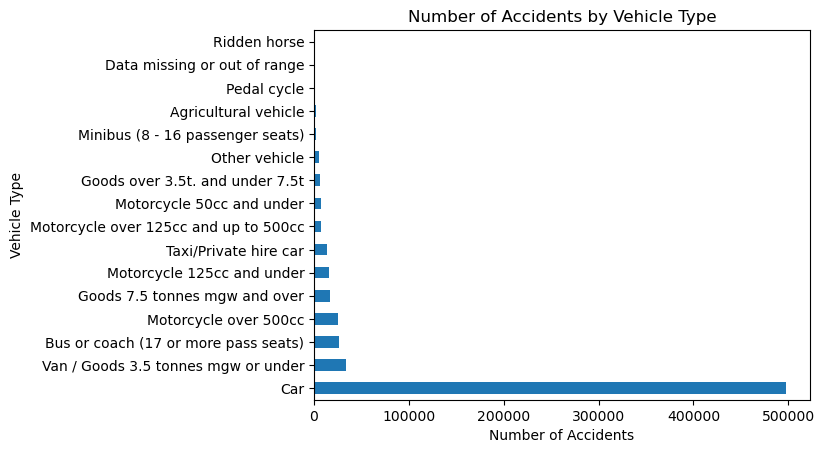

In [24]:
vehicle.plot(kind='barh')
plt.title('Number of Accidents by Vehicle Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.show()

<h1>Insight #4</h1>
<h3>Cars experiences the most accidents with 497,992 accidents, having the biggest gap from all of the vehicles being only followed by Van with 34,160.</h3>
<hr>
<h3>5. What is the average number of casualties and vehicles in the road accidents?</h3>

In [26]:
road_accidents['Number_of_Casualties'].mean()

1.357040257068864

In [27]:
road_accidents['Number_of_Vehicles'].mean()

1.8312554205597575

<h1>Insight #5</h1>
<h3>The average number of casualties is 1.35 and the average number of vehicles is 1.83.</h3>
<hr>
<h3>6. How many accidents have more than 1 vehicle involved?
</h3>

In [29]:
(road_accidents['Number_of_Vehicles'] > 1).value_counts()

Number_of_Vehicles
True     459892
False    200787
Name: count, dtype: int64

<h1>Insight #6</h1>
<h3>There are about 459,892 accidents that have more than 1 vehicle involved in it.</h3>
<hr>
<h3>7. Which district have the lowest amount of road accidents?</h3>

In [31]:
road_accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1>Insight #7</h1>
<h3>The district area of Clackmannanshire have the lowest with only having 91 road accidents.</h3>
<hr>
<h3>8. What date have the highest amount of accidents in a single day?</h3>

In [156]:
road_accidents['Accident Date'].value_counts()

Accident Date
2021-02-11    685
2021-10-06    680
2019-12-06    678
2019-02-01    676
2021-12-04    667
             ... 
2022-01-09    236
2022-12-02    236
2022-04-05    231
2022-02-07    213
2022-01-10    123
Name: count, Length: 576, dtype: int64

<h1>Insight #8</h1>
<h3>In 2021-02-11, the most accidents happened with about 685 being recorded that day.</h3>
<hr>
<h3>9. Base on the latitude, what location does most accidents happen?</h3>

In [36]:
road_accidents['Latitude'].value_counts()

Latitude
52.458798    50
52.949719    45
53.083165    33
52.967634    31
52.938860    29
             ..
53.657705     1
53.628677     1
53.643256     1
53.629944     1
57.575210     1
Name: count, Length: 511619, dtype: int64

<h1>Insight #9</h1>
<h3>The area with the 52.458798 for its latitude have the highest amount of accidents with 50.</h3>
<hr>
<h3>10.  Which area has more fatal accidents, urban or rural?</h3>

In [38]:
more_fatal = road_accidents.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size()
more_fatal

Urban_or_Rural_Area  Accident_Severity
Rural                Fatal                  5601
                     Serious               37312
                     Slight               196077
Unallocated          Fatal                     0
                     Serious                   1
                     Slight                   10
Urban                Fatal                  3060
                     Serious               50904
                     Slight               367714
dtype: int64

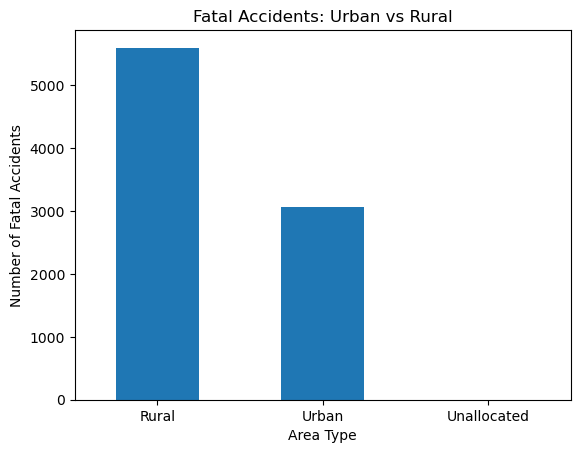

In [126]:
fatal_accidents = road_accidents[road_accidents['Accident_Severity'] == 'Fatal']
fatal_area = fatal_accidents['Urban_or_Rural_Area'].value_counts()

fatal_area.plot(kind='bar')
plt.title('Fatal Accidents: Urban vs Rural')
plt.xlabel('Area Type')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=0)
plt.show()

<h1>Insight #10</h1>
<h3>Rural areas experiences more fatal accidents with it having 2,541 more than the urban areas.</h3>
<hr>
<h3>11. What is the total number of casualties from the dataset?</h3>

In [41]:
road_accidents["Number_of_Casualties"].sum()

896568

<h1>Insight #11</h1>
<h3>There are a total of 896,568 casualties from all the accidents in the dataset.</h3>
<hr>
<h3>12. Which area has more total number of casualties, Urban or Rural?</h3>

In [43]:
area_casualties = road_accidents.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum()
area_casualties

Urban_or_Rural_Area
Rural          353515
Unallocated        13
Urban          543040
Name: Number_of_Casualties, dtype: int64

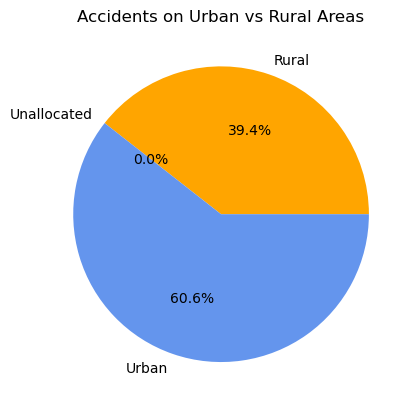

In [142]:
area_casualties.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'black', 'cornflowerblue'])
plt.title('Accidents on Urban vs Rural Areas')
plt.ylabel('')
plt.show()

<h1>Insight #12</h1>
<h3>Urban areas have more number of casualties with the combined number of 543,040.</h3>
<hr>
<h3>13. Which accident severity have the highest avereage number of vehicles?</h3>

In [46]:
road_accidents.groupby("Accident_Severity")["Number_of_Vehicles"].mean()

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h1>Insight #13</h1>
<h3>Slight accidents have the highest average number of vehicles with an average of 1.85.</h3>
<hr>
<h3>14. Which road type have the lowest average number of casualties?</h3>

In [48]:
road_accidents.groupby("Road_Type")["Number_of_Casualties"].mean()

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.343788
Slip road             1.423661
Name: Number_of_Casualties, dtype: float64

<h1>Insight #14</h1>
<h3>One way streets have the lowest average number of casualties with an average of 1.19.</h3>
<hr>
<h3>15. Which weather condition causes the most fatal accidents?</h3>

In [182]:
fatal_weather = road_accidents.groupby(['Weather_Conditions', 'Accident_Severity']).size()
fatal_weather

Weather_Conditions     Accident_Severity
Fine + high winds      Fatal                   175
                       Serious                1245
                       Slight                 7134
Fine no high winds     Fatal                  7207
                       Serious               73285
                       Slight               454521
Fog or mist            Fatal                    82
                       Serious                 483
                       Slight                 2963
Other                  Fatal                   165
                       Serious                1801
                       Slight                15184
Raining + high winds   Fatal                   145
                       Serious                1261
                       Slight                 8209
Raining no high winds  Fatal                   848
                       Serious                9468
                       Slight                69380
Snowing + high winds   Fatal             

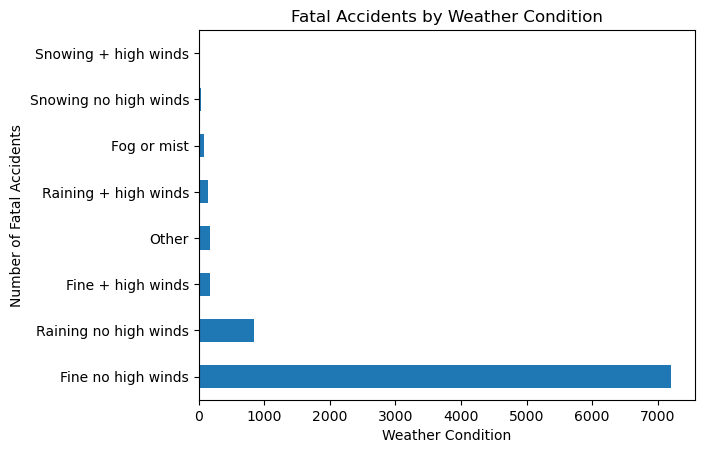

In [184]:
fatal_weather = road_accidents[road_accidents['Accident_Severity'] == 'Fatal']

fatal_weather['Weather_Conditions'].value_counts().plot(kind='barh')
plt.title('Fatal Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.show()

<h1>Insight #15</h1>
<h3>The weather condition 'Fine + high winds' causes the most fatal accidents with more than 7,000 accidents.</h3>
<hr>
<h3>16. Which light condition causes the least amount of serious accidents?</h3>

In [53]:
light = road_accidents.groupby(['Light_Conditions', 'Accident_Severity']).size()
light

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Fatal                    68
                             Serious                 794
                             Slight                 5622
Darkness - lights lit        Fatal                  1860
                             Serious               19130
                             Slight               108345
Darkness - lights unlit      Fatal                    45
                             Serious                 360
                             Slight                 2138
Darkness - no lighting       Fatal                  1612
                             Serious                7174
                             Slight                28651
Daylight                     Fatal                  5076
                             Serious               60759
                             Slight               419045
dtype: int64

<h1>Insight #16</h1>
<h3>The light condition 'Darkness - light unlit' causes the least amount of serious accidents.</h3>
<hr>
<h3>17. Which combination of road type and light conditions causes the most amount of accidents?</h3>

In [201]:
road_light = road_accidents.groupby(['Road_Type', 'Road_Surface_Conditions']).size().unstack(fill_value=0)
road_light

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Road_Type,,,,,
Dual carriageway,66272,302,2408,909,29533
One way street,10100,5,183,76,3195
Roundabout,30784,22,745,232,12209
Single carriageway,336671,679,15003,4613,139697
Slip road,4720,9,178,60,2074


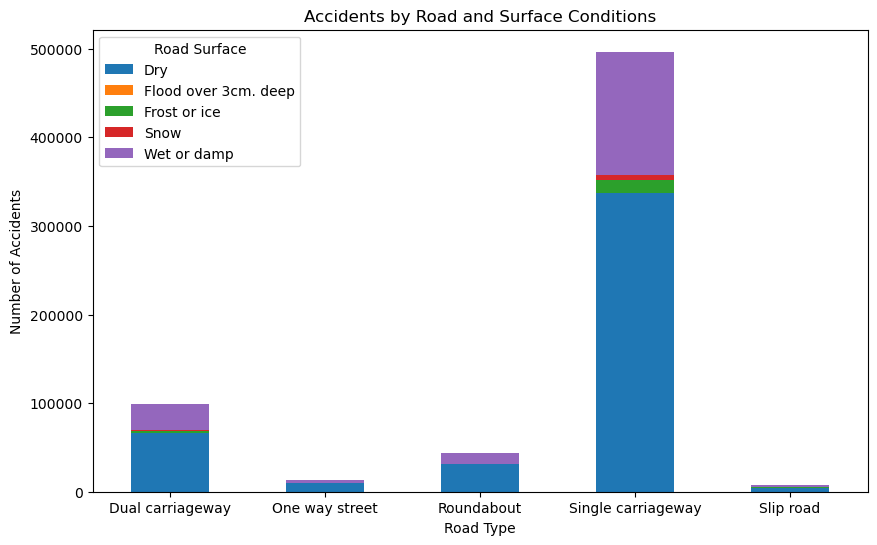

In [264]:
road_light.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Accidents by Road and Surface Conditions')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Road Surface')
plt.xticks(rotation=0)
plt.show()

<h1>Insight #17</h1>
<h3>Base on the data, dry single carriageway have the most amount of accidents with about 336,671 from the almost 500,000 accidents that happened just by the single carriageway</h3>
<hr>
<h3>18. Which combination of weather and road surface causes the least accidents?</h3>

In [254]:
surface_weather = road_accidents.groupby(['Light_Conditions', 'Weather_Conditions']).size().unstack(fill_value=0)
surface_weather

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Light_Conditions,,,,,,,,
Darkness - lighting unknown,59,5333,65,186,111,621,15,94
Darkness - lights lit,1852,93958,921,4803,3066,22666,241,1828
Darkness - lights unlit,51,1745,37,143,73,459,5,30
Darkness - no lighting,796,25251,862,1915,1423,6208,171,811
Daylight,5796,408726,1643,10103,4942,49742,453,3475


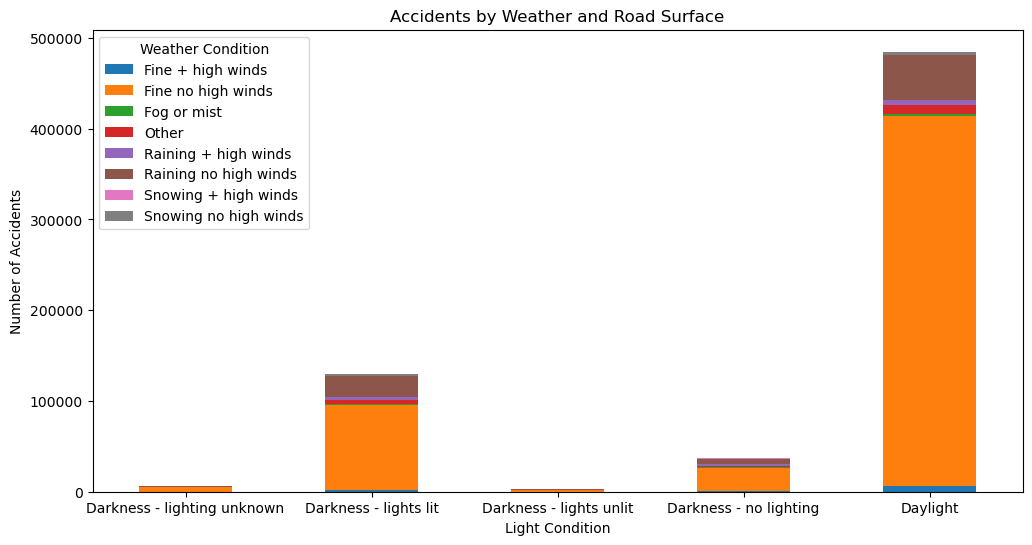

In [274]:
surface_weather.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Accidents by Weather and Road Surface')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Condition')
plt.xticks(rotation=0)
plt.show()

<h1>Insight #18</h1>
<h3>Base on the data, the combination of daylight and fine no high winds weather causes the most accidents with about 408,726.</h3>
<hr>
<h3>19. Which combination of weather and road surface causes the most accidents?</h3>

In [60]:
road_type_surface = road_accidents.groupby(['Road_Type', 'Road_Surface_Conditions']).size()
road_type_surface

Road_Type           Road_Surface_Conditions
Dual carriageway    Dry                         66272
                    Flood over 3cm. deep          302
                    Frost or ice                 2408
                    Snow                          909
                    Wet or damp                 29533
One way street      Dry                         10100
                    Flood over 3cm. deep            5
                    Frost or ice                  183
                    Snow                           76
                    Wet or damp                  3195
Roundabout          Dry                         30784
                    Flood over 3cm. deep           22
                    Frost or ice                  745
                    Snow                          232
                    Wet or damp                 12209
Single carriageway  Dry                        336671
                    Flood over 3cm. deep          679
                    Frost or ice      

<h1>Insight #19</h1>
<h3>A single carriegeway road with dry surface causes the most accidents with 336,671 accidentS.</h3>
<hr>
<h3>20. Is there a correlation between the number of casualties and the vehicles involved?</h3>

In [62]:
casualty_vehicle_corr = road_accidents['Number_of_Casualties'].corr(road_accidents['Number_of_Vehicles'])
casualty_vehicle_corr

0.22888886126909824

<h1>Insight #20</h1>
<h3>There is no correlation between the number of casualties and the number of vehicle in the road accidents.</h3>
<hr>
<h3>21. What year have the highest record of fatal accidents?</h3>

In [65]:
fatal_year = road_accidents.groupby(['Year','Accident_Severity']).size()
fatal_year

Year  Accident_Severity
2019  Fatal                 1116
      Serious               9823
      Slight               60928
2020  Fatal                  942
      Serious               9346
      Slight               59875
2021  Fatal                  823
      Serious               8858
      Slight               56491
2022  Fatal                  623
      Serious               7266
      Slight               48916
dtype: int64

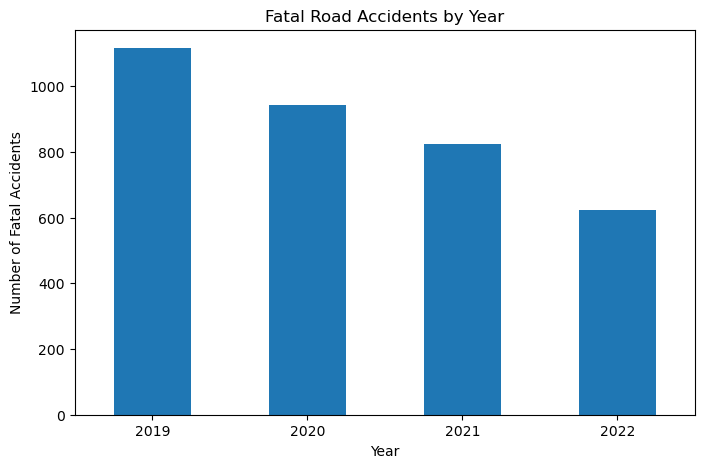

In [66]:
fatal_by_year = road_accidents[road_accidents['Accident_Severity'] == 'Fatal'].groupby('Year').size()

# Plot
plt.figure(figsize=(8,5))
fatal_by_year.plot(kind='bar')

plt.title("Fatal Road Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fatal Accidents")
plt.xticks(rotation=0)
plt.show()

<h1>Insight #21</h1>
<h3>In 2019, there are about 1,116 accidents that are considered fatal making the year with the highest record of fatal accidents.</h3>
<hr>
<h3>22. Do weekends have more fatal accidents than weekdays?</h3>

In [68]:
daysoftheweek = road_accidents.groupby(['DayOfWeek','Accident_Severity']).size()
daysoftheweek

DayOfWeek  Accident_Severity
0          Fatal                  561
           Serious               4608
           Slight               23395
1          Fatal                  453
           Serious               4848
           Slight               33413
2          Fatal                  434
           Serious               5001
           Slight               34602
3          Fatal                  468
           Serious               4933
           Slight               34240
4          Fatal                  471
           Serious               5218
           Slight               34133
5          Fatal                  540
           Serious               5596
           Slight               37028
6          Fatal                  577
           Serious               5089
           Slight               29399
dtype: int64

<h1>Insight #22</h1>
<h3>Based on the data, fatal accidents usually happen on days 5-6 (weekends) as having an average of 558.5 and only about 477.4 from days 0 - 4 (weekdays).</h3>
<hr>
<h3>23. What month have the least amount of combined casualties?</h3>

In [70]:
month_casualties = road_accidents.groupby("Month")["Number_of_Casualties"].sum()
month_casualties

Month
1     24810
2     29714
3     29163
4     27377
5     29446
6     29764
7     31006
8     29280
9     30597
10    32089
11    32682
12    32413
Name: Number_of_Casualties, dtype: int64

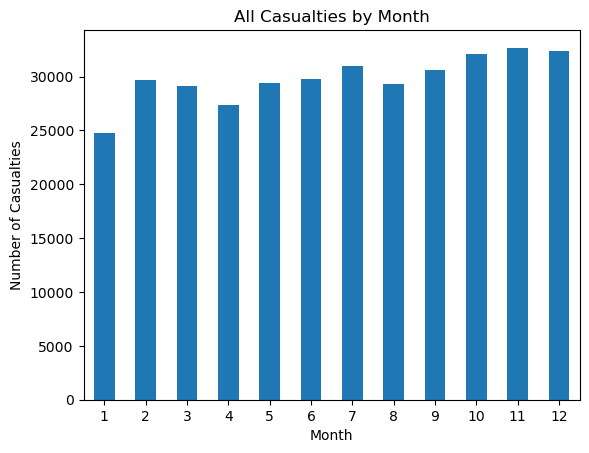

In [132]:
month_casualties.plot(kind='bar')
plt.title('All Casualties by Month')
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)
plt.show()

<h1>Insight #23</h1>
<h3>Month 1 (January) have the least amount of combined casualties with about 24,810 casualties in the whole month of April.</h3>
<hr>
<h3>24. Which months are affected by certain weather conditions?</h3>

In [73]:
month_weather = road_accidents.groupby(['Weather_Conditions','Month']).size()
month_weather.unstack(level=0)

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Month,,,,,,,,
1,745,11534,126,1474,803,2522,112,936
2,289,16868,284,1207,165,1850,193,1408
3,635,18454,16,426,536,1635,23,99
4,161,17924,63,230,58,1171,22,158
5,217,19277,14,214,142,1851,2,6
6,44,19921,50,192,36,1948,0,5
7,129,19004,6,306,190,3295,0,9
8,62,18012,14,250,77,2683,1,7
9,196,19067,24,271,295,2701,0,4


<h1>Insight #24</h1>
<h3>Starting from Month 5 (May), weather conditions such as snowing experience a big drop of 97.7% all the way to Month 11 (November) while other experience an increase such as 'raining' with a 83.7% increase compared to its first 6 months.</h3>
<hr>
<h3>25. Do urban and rural areas have the same amount of accidents on different road surfaces each month?</h3>

In [75]:
month_urban_rural = road_accidents.groupby(['Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Month']).size()
month_urban_rural.unstack()

Month                                          1     2      3      4      5   \
Road_Surface_Conditions Urban_or_Rural_Area                                    
Dry                     Rural                1495  3277   5013   5987   6137   
                        Unallocated             0     0      0      0      2   
                        Urban                4239  8213  11372  10901  12310   
Flood over 3cm. deep    Rural                  34    19     22      5      9   
                        Unallocated             0     0      0      0      0   
                        Urban                   8     4      3      4      4   
Frost or ice            Rural                1458  1448    355     49      2   
                        Unallocated             0     0      0      0      0   
                        Urban                1302   915    149     18      3   
Snow                    Rural                 448   630     70     68      3   
                        Unallocated             0     0      0      0      0   
                        Urban                 479   654     21     37      0   
Wet or damp             Rural                3506  2891   2091   1207   1438   
                        Unallocated             0     0      0      0      0   
                        Urban                5283  4213   2728   1511   1815   

Month                                           6      7      8      9   \
Road_Surface_Conditions Urban_or_Rural_Area                               
Dry                     Rural                 6536   5963   6106   6031   
                        Unallocated              1      0      0      0   
                        Urban                12566  11450  10596  11725   
Flood over 3cm. deep    Rural                   16     35     19     52   
                        Unallocated              0      1      0      0   
                        Urban                    7     16     12     10   
Frost or ice            Rural                    1      1      1      2   
                        Unallocated              0      0      0      0   
                        Urban                    1      1      1      2   
Snow                    Rural                    1      1      3      1   
                        Unallocated              0      0      0      0   
                        Urban                    2      3      1      1   
Wet or damp             Rural                 1341   2452   2112   2082   
                        Unallocated              0      0      0      0   
                        Urban                 1724   3016   2255   2652   

Month                                           10    11    12  
Road_Surface_Conditions Urban_or_Rural_Area                     
Dry                     Rural                 5502  3762  2020  
                        Unallocated              0     0     0  
                        Urban                11776  9062  6257  
Flood over 3cm. deep    Rural                   22    44    39  
                        Unallocated              0     0     0  
                        Urban                    5    11     7  
Frost or ice            Rural                   10    87  1987  
                        Unallocated              0     0     0  
                        Urban                    2    36  1359  
Snow                    Rural                    1     7   240  
                        Unallocated              0     0     0  
                        Urban                    3     7   226  
Wet or damp             Rural                 2779  4512  4531  
                        Unallocated              0     0     0  
                        Urban                 3862  6712  7490

<h1>Insight #25</h1>
<h3>Across the months, urban and rural almost always have the same amount of accidents from different surface conditions only 'Dry' having the most difference from all of them.</h3>
<hr>